In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime



Load the database

In [3]:
dataset = pd.read_csv('../creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Il dataset contiene 284807 transazioni effettuate da carte di credito nel settembre 2013.

Il dataset è estremamente sbilanciato in quanto sono presenti 492 frodi (0.172%) sulle 284807 transazioni totali.

Le feature V1, ..., V28 sono le principal components ottenuta da una PCA; la feature Time contiene i secondi trascorsi tra ciascuna transazione e la prima transazione del dataset; la feature Amount indica l'importo della transazione; infine la feature Class vale 1 se tale transazione è una frode e 0 altrimenti.

In [17]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [12]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [14]:
dataset.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [15]:
# rimozione dei duplicati dal dataset
dataset = dataset.drop_duplicates()
dataset.count()

Time      283726
V1        283726
V2        283726
V3        283726
V4        283726
V5        283726
V6        283726
V7        283726
V8        283726
V9        283726
V10       283726
V11       283726
V12       283726
V13       283726
V14       283726
V15       283726
V16       283726
V17       283726
V18       283726
V19       283726
V20       283726
V21       283726
V22       283726
V23       283726
V24       283726
V25       283726
V26       283726
V27       283726
V28       283726
Amount    283726
Class     283726
dtype: int64

In [16]:
# non sono presenti valori mancanti, nulli.
dataset.isnull().values.sum()

0

Visualizzazione della distribuzione delle osservazioni del dataset

Boxplot

c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:grey'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:grey'` for same 

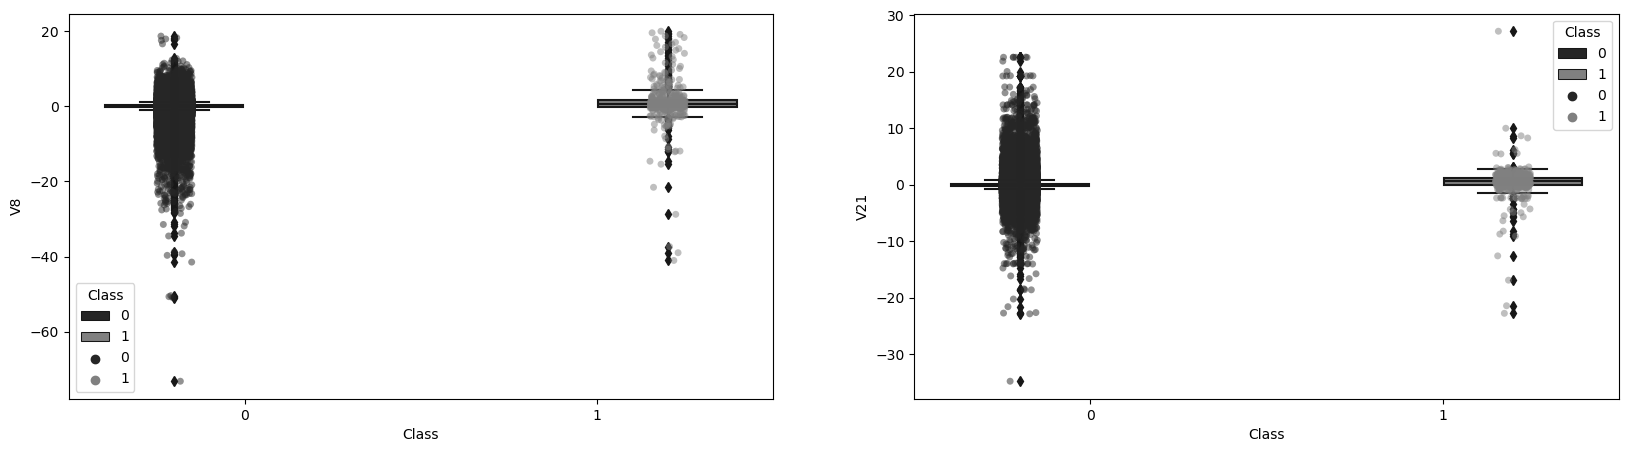

In [24]:
#è possibile osservare come per le features V8 e V21 la mediana è in un intorno del valor medio,
# con pochi outliers, soprattutto per valori negativi della feature

cols = ['V8', 'V21']
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette='dark:grey', data=dataset, ax=axes[index]) 
    sns.stripplot(x='Class', y=col,  data=dataset,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

Istogrammi

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


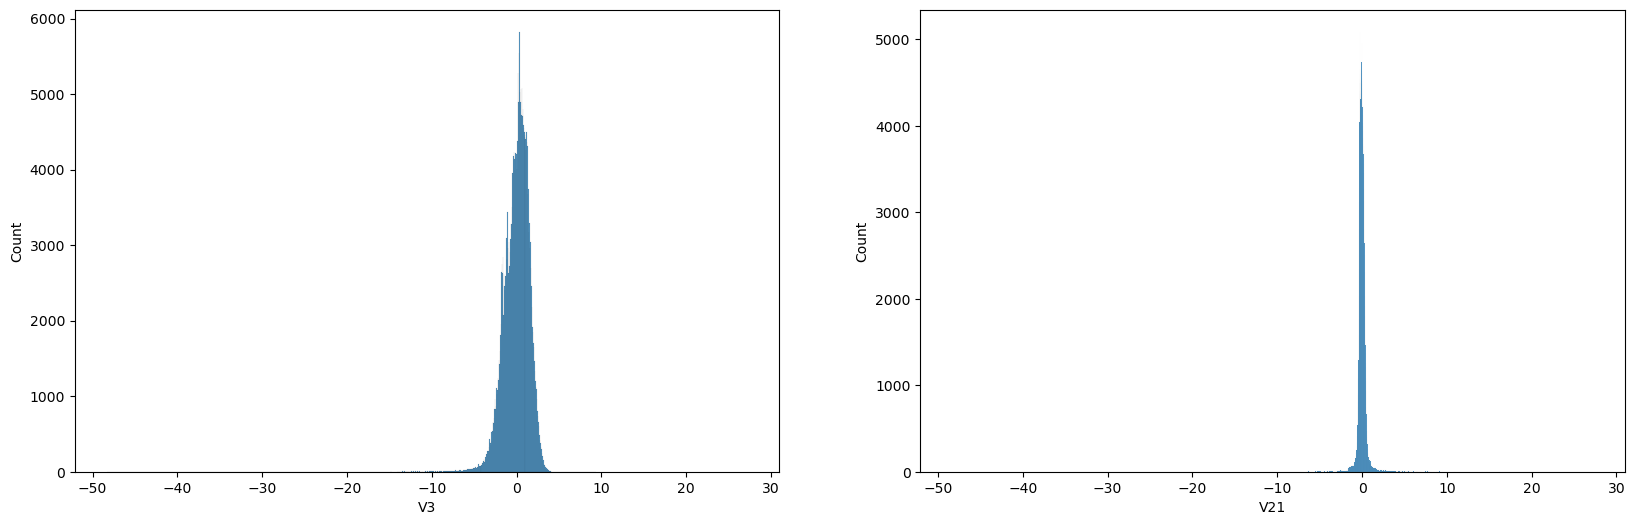

In [29]:
# i seguenti istogrammi mostrano come le osservazioni siano quasi tutte in un intorno del valor medio
# (qui circa 0 per le feature V3 e V21); è però evidente come le osservazioni della feature V3 hanno
# una varianza maggiore rispetto a quelle della feature V21.
f, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.histplot(dataset['V3'],ax=axes[0])
sns.histplot(dataset['V21'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

Per confrontare le distribuzioni di più di una variabile alla volta (ed individuare eventuali correlazioni) è possibile utilizzare i pair plots, una combinazione di istogrammi e scatter plots.

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

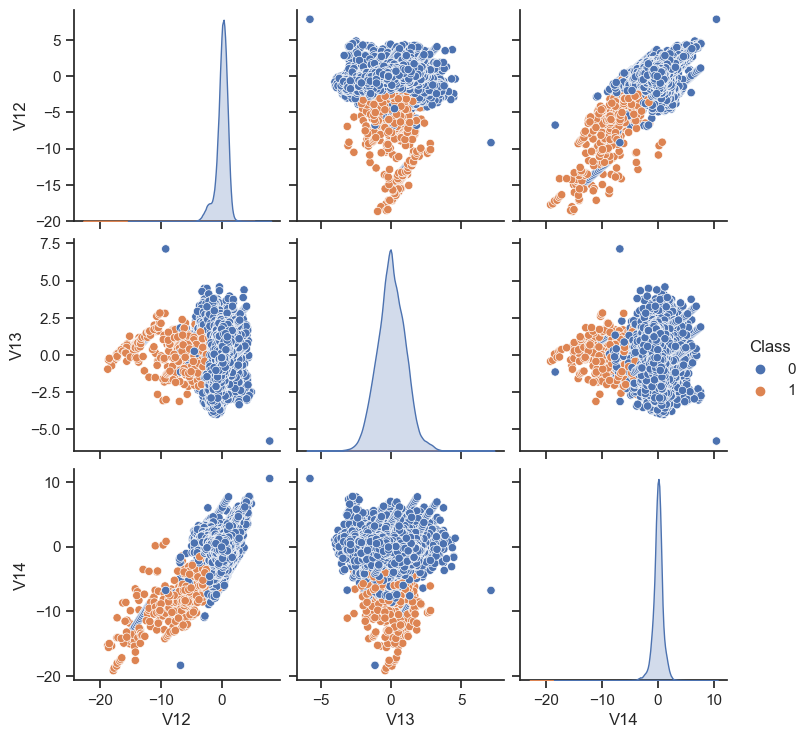

In [30]:
# dalla matrice seguente è possibile osservare come tutte le osservazioni delle 3 feature siano
# concentrate in un intorno del valor medio (ossia il valor 0). 
# Tra queste 3 feature sembra non esserci correlazione, 
# suggerendo come possano essere usate tutte e 3 in un successivo classificatore
sns.set_theme(style="ticks")
sns.pairplot(dataset[["V12","V13","V14","Class"]], hue="Class")

Per poter analizzare la correlazione tra tutte le feature, è utile realizzare una matrice di correlazione
È utilizzata la correlazione di Pearson. Essendo le features V1-V28 ottenute eseguendo una PCA sul dataset originale esse sono totalmente scorrelate.

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223 -0.063279   
V1      0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413   
V2     -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594   
V3     -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511   
V4     -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880   
V5      0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938   
V6     -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938  1.000000   
V7      0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709  0.000436   
V8     -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430  0.003036   
V9     -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213 -0.000734   
V10     0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050 -0.002180   
V11    -0.248536  0.001028 -0.000633  0.

<Axes: >

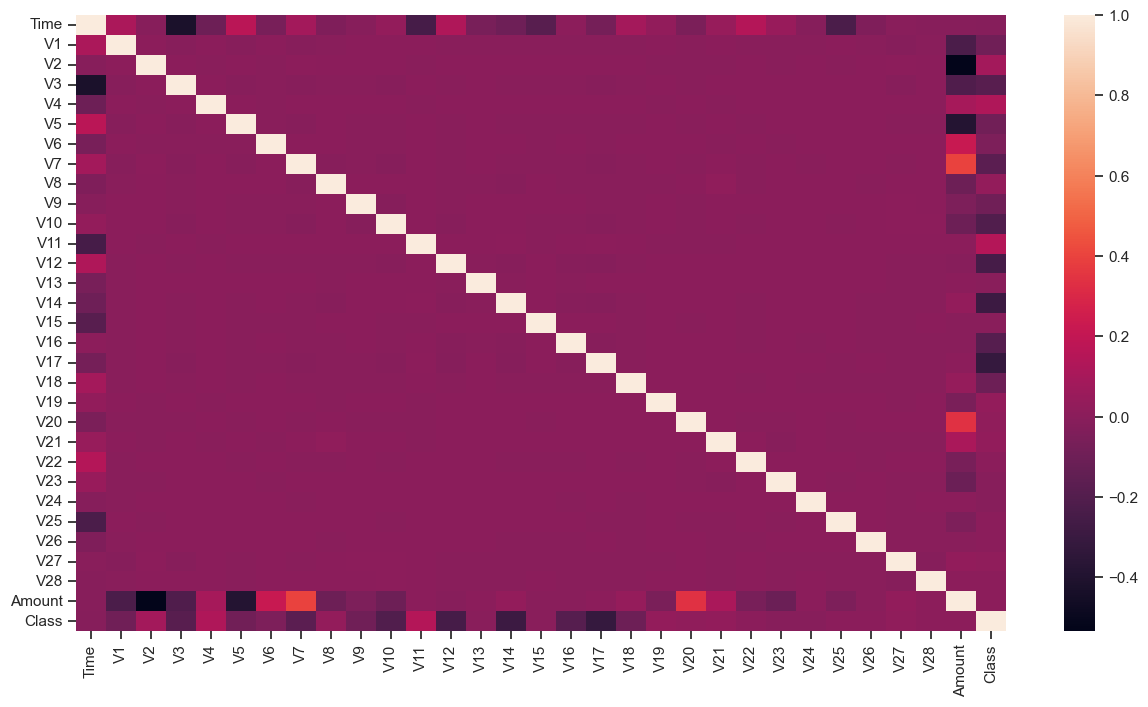

In [35]:
f, ax = plt.subplots(figsize=(15, 8))
corr = dataset.corr()
print(corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Tale matrice mostra come non ci sia affatto correlazione tra le features V1-V28. Un moderato livello di correlazione può però essere identificato tra le seguenti coppie di feature: "V3-Time" (-0.42),"V3-Amount" (-0.21),"V2-Amount" (-0.53),"V7-Amount" (0.4),"V20-Amount" (0.34).
Analizziamo più nel dettaglio le correlazioni tra tali coppie di feature con un pair plot.

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

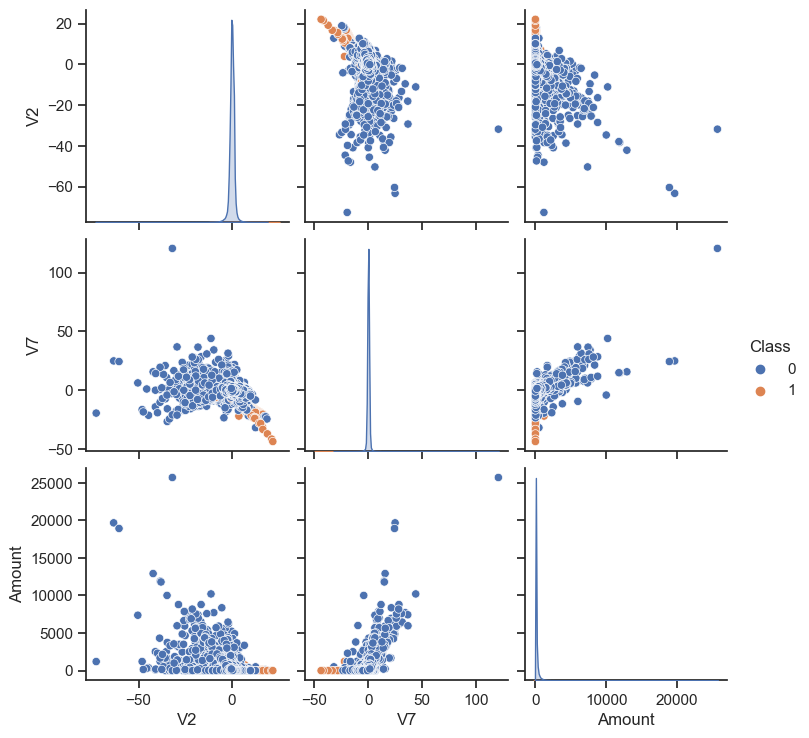

In [38]:
sns.set_theme(style="ticks")
sns.pairplot(dataset[["V2","V7","Amount","Class"]], hue="Class")

Si nota infatti una leggera correlazione tra le coppie di feature "V7-Amount" e "V2-Amount" che però non è così grave ai fini del corretto funzionamento di un successivo classificatore.

Nota: una perfetta correlazione implicherebbe che i punti dei singoli grafici formino una linea perfetta.

A che ora del giorno le persone eseguono degli acquisti?

È utile visualizzare quando avvengono le frodi e se sono presenti eventuali pattern.
Per fare ciò è necessario convertire il tempo da secondi a giorni/ore/settimane.

In [4]:
# Il tempo è fornito in secondi trascorsi dalla prima transazione, perciò possiamo non considerare gli anni
def convert_totime(seconds):
    return datetime.datetime.fromtimestamp(seconds);

timeAnalysis = dataset[['Time', 'Amount', 'Class']].copy()
timeAnalysis['datetime'] = timeAnalysis.Time.apply(convert_totime)
# Poichè il tempo massimo è 172792 secondi che corrisponde a circa 48 ore: 172792 / (60*60)
# graficare i dati ora per ora è utile 
timeAnalysis['hour of the day'] = timeAnalysis.datetime.dt.hour
timeAnalysisGrouped = timeAnalysis.groupby(['Class', 'hour of the day'])['Amount'].count()

<Axes: title={'center': '# of legitimate credit card transactions per hour'}, xlabel='hour of the day'>

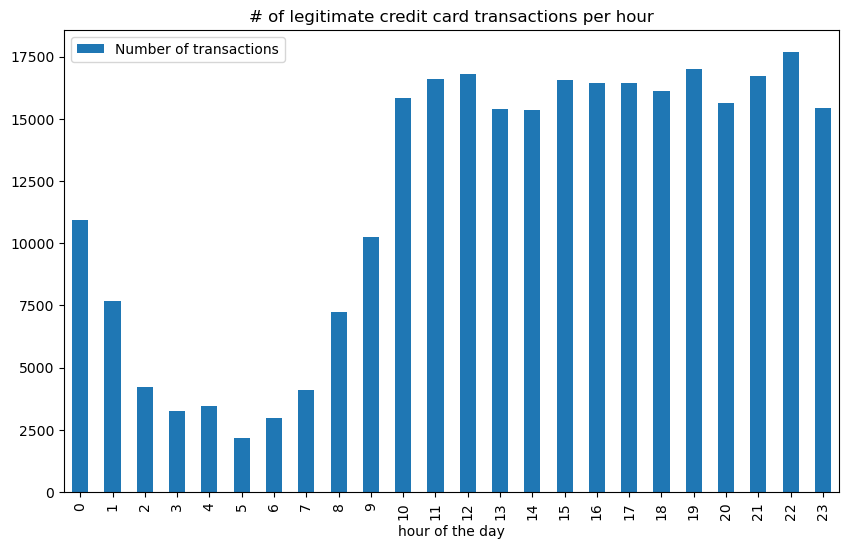

In [5]:
plt.figure(figsize = (10, 6))
validTransactions = timeAnalysisGrouped[0].copy()
validTransactions.name = 'Number of transactions'
validTransactions.plot.bar(title = '# of legitimate credit card transactions per hour', legend = True)

È interessante osservare come la maggior parte delle transazioni avvengano ragionevolmente nell'intervallo 10-23 e solo una minor parte nelle ore 0-9.

<Axes: title={'center': '# of fraud credit card transactions per hour'}, xlabel='hour of the day'>

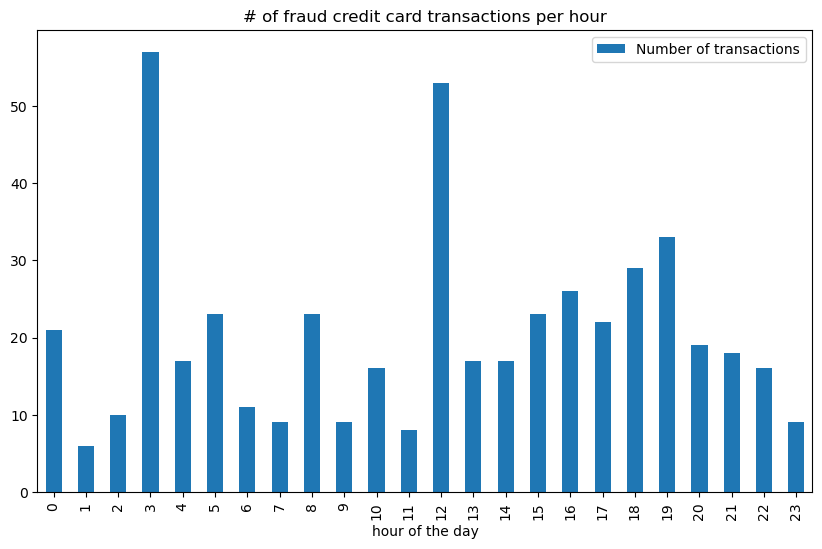

In [6]:
plt.figure(figsize = (10, 6))
fraudTransactions = timeAnalysisGrouped[1].copy()
fraudTransactions.name = 'Number of transactions'
fraudTransactions.plot.bar(title = '# of fraud credit card transactions per hour', legend = True)

È interessante osservare come le transazioni fraudolente siano meglio distribuite nel tempo rispetto a quelle legittime, ad eccezione di alcuni picchi (es 2 AM). Tali picchi possono essere causati dalla presenza di poche transazioni fraudolente nel dataset, rendendo impossibile individuare un trend come per le transazioni legittime.

Le transazioni fraudolente hanno importo maggiore rispetto alle transazioni normali?

Per verificare tale ipotesi si può costruire un test d'ipotesi:

-H0 (ipotesi nulla): le transazioni fraudolente hanno valore minore o uguale a quelle normali (AmountFraud<=AmountNormal);

-HA: le transazioni fraudolente hanno valore maggiore di quelle normali (AmountFraud>AmountNormal).

<Axes: title={'center': 'Histogram of valid transactions'}, ylabel='Frequency'>

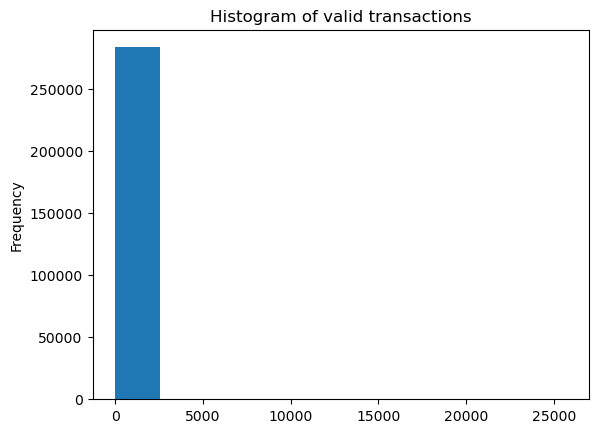

In [7]:
# Valid Transactions
timeAnalysis[timeAnalysis.Class == 0].Amount.plot.hist(title = 'Histogram of valid transactions')

<Axes: title={'center': 'Histogram of valid transactions (Amount <= 4K)'}, ylabel='Frequency'>

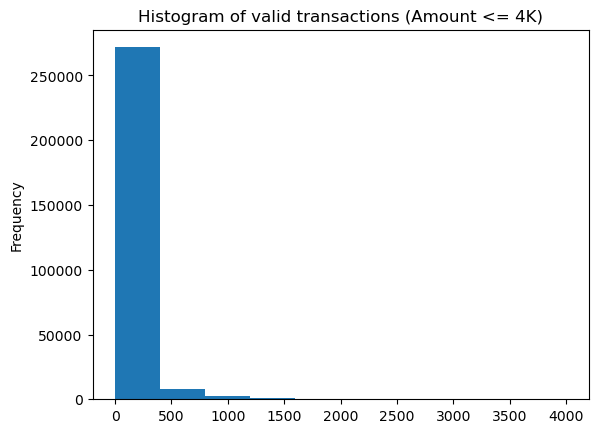

In [8]:
# il valore della maggior parte delle transazioni sembra essere tra 2000 e 2500.
# è utile analizzare tale intervallo di osservazioni più in dettaglio
timeAnalysis[(timeAnalysis.Class == 0) & (timeAnalysis.Amount <= 4000)].Amount.plot.hist(title = 'Histogram of valid transactions (Amount <= 4K)')

<Axes: title={'center': 'Histogram of fraudulent transactions'}, ylabel='Frequency'>

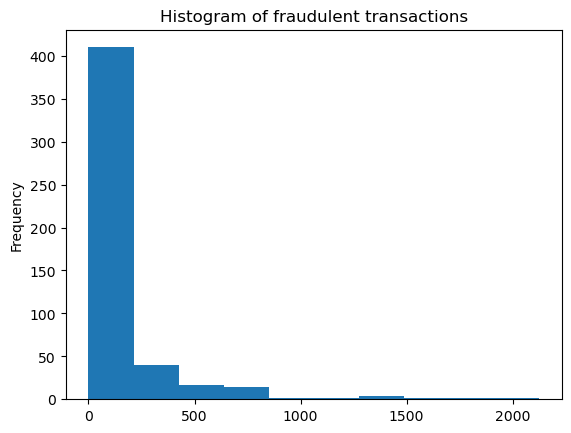

In [9]:
# per le transazioni fraudolente
timeAnalysis[timeAnalysis.Class == 1].Amount.plot.hist(title = 'Histogram of fraudulent transactions')

Visivamente non sembrerebbe emergere alcuna differenza: verifichiamo col test d'ipotesi.


Utilizziamo un livello di significatività del 99% e calcoliamo la statistica del test.
Come stimatore per la media della popolazione (tx normali) usiamo la media campionaria (tx fraudolenti).

$$
\text{z-score} = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}
$$
$$
\bar{x}: \text{media campionaria (tx fraudolenti)}
$$
$$
\mu: \text{media della popolazione (tx normali)}
$$
$$
\sigma: \text{deviazione standard della popolazione (tx normali)}
$$
$$
\text{n}: \text{taglia del campione (tx fraudolenti)}
$$


In [10]:
population = timeAnalysis[timeAnalysis.Class == 0].Amount
sample = timeAnalysis[timeAnalysis.Class == 1].Amount
sampleMean = sample.mean()
populationStd = population.std()
populationMean = population.mean()

In [12]:
z_score = (sampleMean - populationMean) / (populationStd / sample.size ** 0.5)
print(f"z-score = {z_score}")

z-score = 3.008289898210001


Dato che la statistica del test è maggiore di 2.33 (il quantile Z(1%)) rifiutiamo l'ipotesi nulla H0. Segue che c'è il 99% di probabilità che l'importo speso in transazioni fraudolente sia maggiore di quello speso in transazioni legittime.

Eseguiamo un test d'ipotesi per ognuna delle 28 feature (V1, ..., V28) per vedere se il valore della feature per transazioni fraudolente è significativamente diverso da quello della transazione normale (se i valori di tale feature sono simili per entrambi i tipi di transazioni essa non è significativa per discernere tra transazioni fraudolente e non).

Utilizziamo sempre un livello di significatività del 99% e rifiutiamo se la statistica del test (ora in valore assoluto) è maggiore del quantile Z(0.5%) ossia 2.58 .

In [13]:
PDA_columns = [x for x in dataset.columns if 'V' in x]

valid_transactions = dataset[dataset.Class == 0]
Fraud_transactions = dataset[dataset.Class == 1]

sample_size = Fraud_transactions.shape[0]
for col in PDA_columns:
    mean = valid_transactions[col].mean()
    std = valid_transactions[col].std()
    zScore = (Fraud_transactions[col].mean() - mean) / (std/sample_size**0.5)
    print ('Column', col, 'is', 'Significant' if abs(zScore) >= 2.58 else 'insignificant')

Column V1 is Significant
Column V2 is Significant
Column V3 is Significant
Column V4 is Significant
Column V5 is Significant
Column V6 is Significant
Column V7 is Significant
Column V8 is Significant
Column V9 is Significant
Column V10 is Significant
Column V11 is Significant
Column V12 is Significant
Column V13 is insignificant
Column V14 is Significant
Column V15 is insignificant
Column V16 is Significant
Column V17 is Significant
Column V18 is Significant
Column V19 is Significant
Column V20 is Significant
Column V21 is Significant
Column V22 is insignificant
Column V23 is insignificant
Column V24 is Significant
Column V25 is insignificant
Column V26 is insignificant
Column V27 is Significant
Column V28 is Significant


Le feature V13, V15, V22, V23, V25, V26 non sono molto utili per differenziare tra transazioni fraudolente e legittime. Probabilmente rimuovere tali features potrebbe essere utile per costruire classificatori migliori.